In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df  = pd.read_csv('temperature.csv')
df.head(1)

,Date,Celcius,Farenheit
0,1-Dec-24,23,73.4


In [ ]:
features_name = ['Celcius']
label = 'Farenheit'

In [ ]:
X = df[features_name]
y = df[label]

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

model.coef_, model.intercept_

(array([1.8]), 32.00000000000001)

In [ ]:
# convert X
X = X.to_numpy().reshape(-1)

In [ ]:
# convert y
y = y.to_numpy()

In [ ]:
print(X.shape, y.shape)

(24,) (24,)


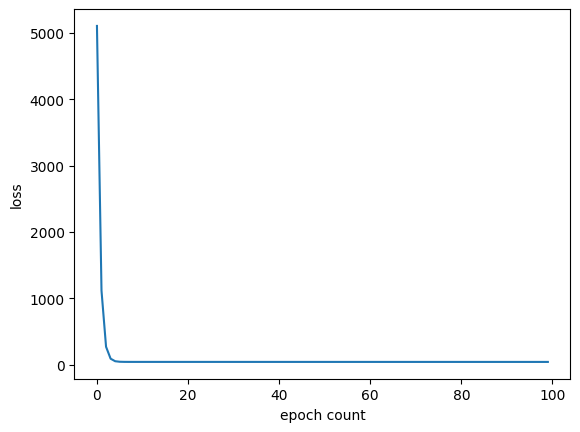

{'w': 3.1225701376846535, 'b': 0.6369297784267972}


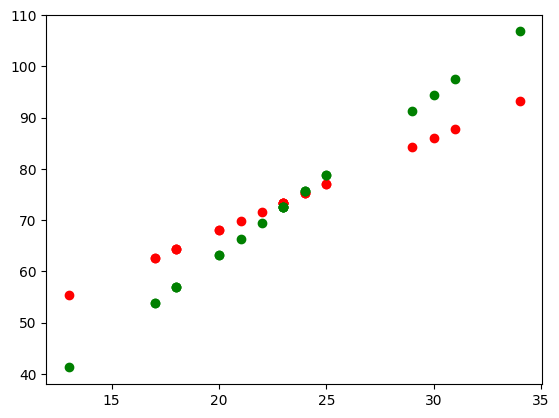

In [ ]:
class MyLinearRegression:
    def __init__(self):
        self.params = {}
        self.params['w'] = np.random.rand()
        self.params['b'] = np.random.rand()

    def predict(self, X):
        y_hat = self.params['w'] * X + self.params['b']
        y_hat = y_hat.flatten()
        return y_hat

    def calculate_gradient(self, X,  y, y_hat):
        # print(y.shape, y_hat.shape)
        dw = np.mean((y_hat - y) * X)
        db = np.mean(y_hat - y)

        derivative = {
            'dw': dw,
            'db': db
        }

        return derivative


    def loss(self, y, y_hat):
        return np.mean((y-y_hat)**2)

    def fit(self, X, y, epochs=100, lr=0.01):
        losses = []
        for epoch in range(epochs):
            # print(f'in {epoch} th epoch')
            y_hat = self.predict(X)
            derivative = self.calculate_gradient(X, y, y_hat)
            self.params['w'] = self.params['w'] - lr * derivative['dw']
            self.params['b'] = self.params['b'] - lr * derivative['db']

            # print(self.params['w'], self.params['b'])

            _loss = self.loss(y, y_hat)
            # print(f'epoch: {epoch}; loss: {_loss}')
            losses.append(_loss)

        plt.plot(losses)
        plt.xlabel('epoch count')
        plt.ylabel('loss')
        plt.show()

mymodel = MyLinearRegression()
mymodel.fit(X, y, epochs=100, lr=0.001)

print(mymodel.params)

plt.scatter(X, y, c='r')
plt.scatter(X, mymodel.predict(X), c='g')
